# ECE:5450 Pandas Tutorial

# Code Preface

Below is some code that we will make use of to make our lives easier.  Imports and functions are usually introduced throughout this notebook as needed. But sometimes you need to jump around and run things out of order. This cell below makes it easier to do that by running it before you begin.

**You don't need to look at this code now.**

In [96]:
# imports for modules we will use:
import pandas as pd
import numpy as np
import seaborn as sns
#import feather
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 10)}) # set font and plot size


# Some code to make displaying multiple dataframes side by side better
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


# Some code to generate example dataframes
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# Load imdbb datasets that we'll use
imdbFile = 'IMDB-Movie-Data.csv'
movies_df = pd.read_csv(imdbFile, index_col="Title")
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']

planets = sns.load_dataset('planets')

titanic = sns.load_dataset('titanic')

# Pandas

<img src='https://drive.google.com/uc?id=1QblXB3vwRh63bXvi7pM_yk4PsG6MMw1i' width=500>

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

If you're thinking about data science as a career, then it is imperative that one of the first things you do is learn pandas. In this post, we will go over the essential bits of information about pandas, including how to install it, its uses, and how it works with other common Python data analysis packages such as **matplotlib** and **sci-kit learn**.

<img src="https://drive.google.com/uc?id=1Hsr__ImXc8TRS44Od6jrRzLl1y3Y3cLL" width=500px />

# What's Pandas for?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like


    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?


- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before you jump into the modeling or the complex visualizations you need to have a good understanding of the nature of your dataset and pandas is the best avenue through which to do that.



# How does pandas fit into the data science toolkit?

Not only is the pandas library a central component of the data science toolkit but it is used in conjunction with other libraries in that collection. 

Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.

Before we do anything else, we have to import pandas. For brevity we'll import is as ``pd`` so we don't have to type ``pandas.`` everywhere.

In [54]:
import pandas as pd

Now to the basic components of pandas.

# Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="https://drive.google.com/uc?id=1GNUYVXJ_dZK94GBJZWLbvAD2xOC0K342" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

## Creating DataFrames from scratch

Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict` of `list`s. 

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [55]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

And then pass it to the pandas DataFrame constructor:

In [56]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**How did that work?**

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [57]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


So now we could **loc**ate a customer's order by using their name:

In [58]:
type(purchases.loc['June'])

pandas.core.series.Series

There's more on locating and extracting data from the DataFrame later, but now you should be able to create a DataFrame with any random data to learn on.

Let's move on to some quick methods for creating DataFrames from various other sources.

# Exercise: Create a dataframe of characters from your favorite movie

Create a dataframe from scratch of characters from your favorite movie

Columns could include:
- actor name
- character gender
- A boolean that is True if the character is a villain
- ... and any other column you'd like to add

Make the index of the dataframe the character name

In [59]:
# Create your dataframe here


# How to read data with pandas

It’s quite simple to load data from various file formats into a DataFrame. In the following examples we'll keep using our apples and oranges data, but this time, read it from various files.

## Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [60]:
purchasesFile='purchases.csv'
df = pd.read_csv(purchasesFile) 

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [61]:
df = pd.read_csv(purchasesFile, index_col=0) # Set the index to be the 0th column

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Here we're setting the index to be column zero.

You'll find that most CSVs won't ever have an index column and so usually you don't have to worry about this step.

It's also possible to set an index on a dataframe after its been created with `df.set_index('someIndex')`. You can read more about it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html).



## Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [62]:
purchasesJSONFile='purchases.json'
df = pd.read_json(purchasesJSONFile)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. You can open the `purchases.json` file by pasting the purchasesJSONFile link above into an empty tab on your browser so you can see the file structure.

Pandas will try to figure out how to create a DataFrame by analyzing structure of your JSON, and sometimes it doesn't get it right. Often you'll need to set the `orient` keyword argument depending on the structure, so check out [read_json docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) about that argument to see which orientation you're using.

## Reading data from a SQL database

If you’re working with data from a SQL database you would need to first establish a connection using an appropriate Python library, then pass a query to pandas. 

I'm not going to demonstrate this with code here, as it requires installing a mysql module in Google Colab and having a database running that it can connect to.  However, I'll show you some example code to give you an idea:
```
import pymysql

# Connect to the database:
con = pymysql.connect(host='localhost',user='user',password='password',db='db')

# read the results of a query into a dataframe:
df = pd.read_sql_query("SELECT * FROM purchases", con)
``` 

## Converting back to a CSV, JSON, or SQL

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [63]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

#df.to_sql('new_purchases', con) # This line is commented out, because we didn't establish a connection to a dB

Check out the local Files in Google Colab ( little right arrow under "+Code") to verify that these files have indeed been created on our local machine.

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. With SQL, we’re not creating a new file but instead inserting a new table into the database using our `con` variable from before.

Let's move on to importing some real-world data and detailing a few of the operations you'll be using a lot.

# Exercise: Write your Movie Character dataframe out to a csv file

Using the movie character dataframe that you created earlier, write it out to the csv file "moviechars_df.csv".


In [64]:
# write your code here


Now, open the file by using Google Colab's interface, to verify that it makes wrote correctly and makes sense.

# Basic DataFrame operations

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin:

In [65]:
imdbFile = 'IMDB-Movie-Data.csv'
movies_df = pd.read_csv(imdbFile, index_col="Title")
movies_df

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


We're loading this dataset from a CSV and designating the movie titles to be our index.

Because we did this, Title won't be a column name in our DataFrame (it's the index). If for some reason, we wanted to make an index a column again, we could use the `reset_index()` method:

In [66]:
movies_df.reset_index()

,Title,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Viewing your data



The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [67]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. $\ $ `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [68]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

You'll notice that the index in our DataFrame is the *Title* column, which you can tell by how the word *Title* is slightly lower than the rest of the columns.

## Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [69]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

Seeing the datatype quickly is actually quite useful. Imagine you just imported some JSON and the integers were recorded as strings. You go to do some arithmetic and find an "unsupported operand" Exception because you can't do math with strings. Calling `.info()` will quickly point out that your column you thought was all integers are actually string objects.



In [70]:
movies_df['rank'].describe()

KeyError: 'rank'

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns):

In [ ]:
movies_df.shape

(1000, 11)

Note that `.shape` has no parentheses (its a property, not a method) and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

You'll be going to `.shape` a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

## Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [ ]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Using `append()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp_df` so we aren't working with the real data.

Notice call `.shape` quickly proves our DataFrame rows have doubled.

Now we can try dropping duplicates:

In [ ]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [ ]:
temp_df.drop_duplicates(inplace=True)

Now our `temp_df` *will* have the transformed data automatically. 

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` argument in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Using `last` has the opposite effect: the first row is dropped.

`keep`, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Watch what happens to `temp_df`:

In [ ]:
temp_df = movies_df.append(movies_df)  # make a new copy with duplicates

In [ ]:
temp2_df = temp_df.drop_duplicates(keep=False)
temp2_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

## Column cleanup



Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [ ]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [ ]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [ ]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

## How to work with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [ ]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


Notice `isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing (we'll talk more about aggregation, later): 

In [ ]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

`.isnull()` just by itself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has **128** missing values for `revenue_millions` and **64** missing values for `metascore`.

### Removing null values



Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values. This decision requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [ ]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


This operation will delete any **row** with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify `inplace=True` in this method as well.

So in the case of our dataset, this operation would remove 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

Other than just dropping rows, you can also drop columns with null values by setting `axis=1` in the `dropna()` method.

In [ ]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


### Imputing null values

Imputing missing values (making educated guesses for them based on values that we do have in our data) is a complicated business and it should not be done without an intimate knowledge of the dataset you're working on. In many cases, and particularly when you don't have intimate knowledge of the data, it may be better to remove missing values than to try to impute them.

One simple method for imputing data is to replace it with the average value from the data. This can be done with varying degrees of specificity. For example, we could find the average value for only similar items in the data (e.g., for movies, we might decide to only take the average from the same year from movies that share similar genres).  This is a complicated business and we're not really ready to do this with our current knowledge of pandas. Instead,we can simple impute the values to be the average of all movies:

In [ ]:
revenue_mean = movies_df.revenue_millions.mean()
print(revenue_mean)
temp_df = movies_df.revenue_millions.fillna(revenue_mean)
temp_df.isnull().sum()

82.95637614678897


0

# Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [ ]:
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [ ]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `.apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. This Series is then assigned to a new column called `rating_category`.

You can also use anonymous functions as well. This lambda function achieves the same result as `rating_function`:

In [ ]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

> Vectorization: a style of computer programming where operations are applied to whole arrays instead of individual elements —[Wikipedia](https://en.wikipedia.org/wiki/Vectorization)

A good example of high usage of `apply()` is during natural language processing (NLP) work. You'll need to apply all sorts of text cleaning functions to strings to prepare for machine learning.

# Brief Plotting with Matplotlib

Another great thing about pandas is that it integrates with Matplotlib, a popular plotting library, so you get the ability to plot directly off DataFrames and Series.

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 10)}) # set font and plot size

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore you're data easily.

**Side note:**
For categorical variables utilize Bar Charts and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

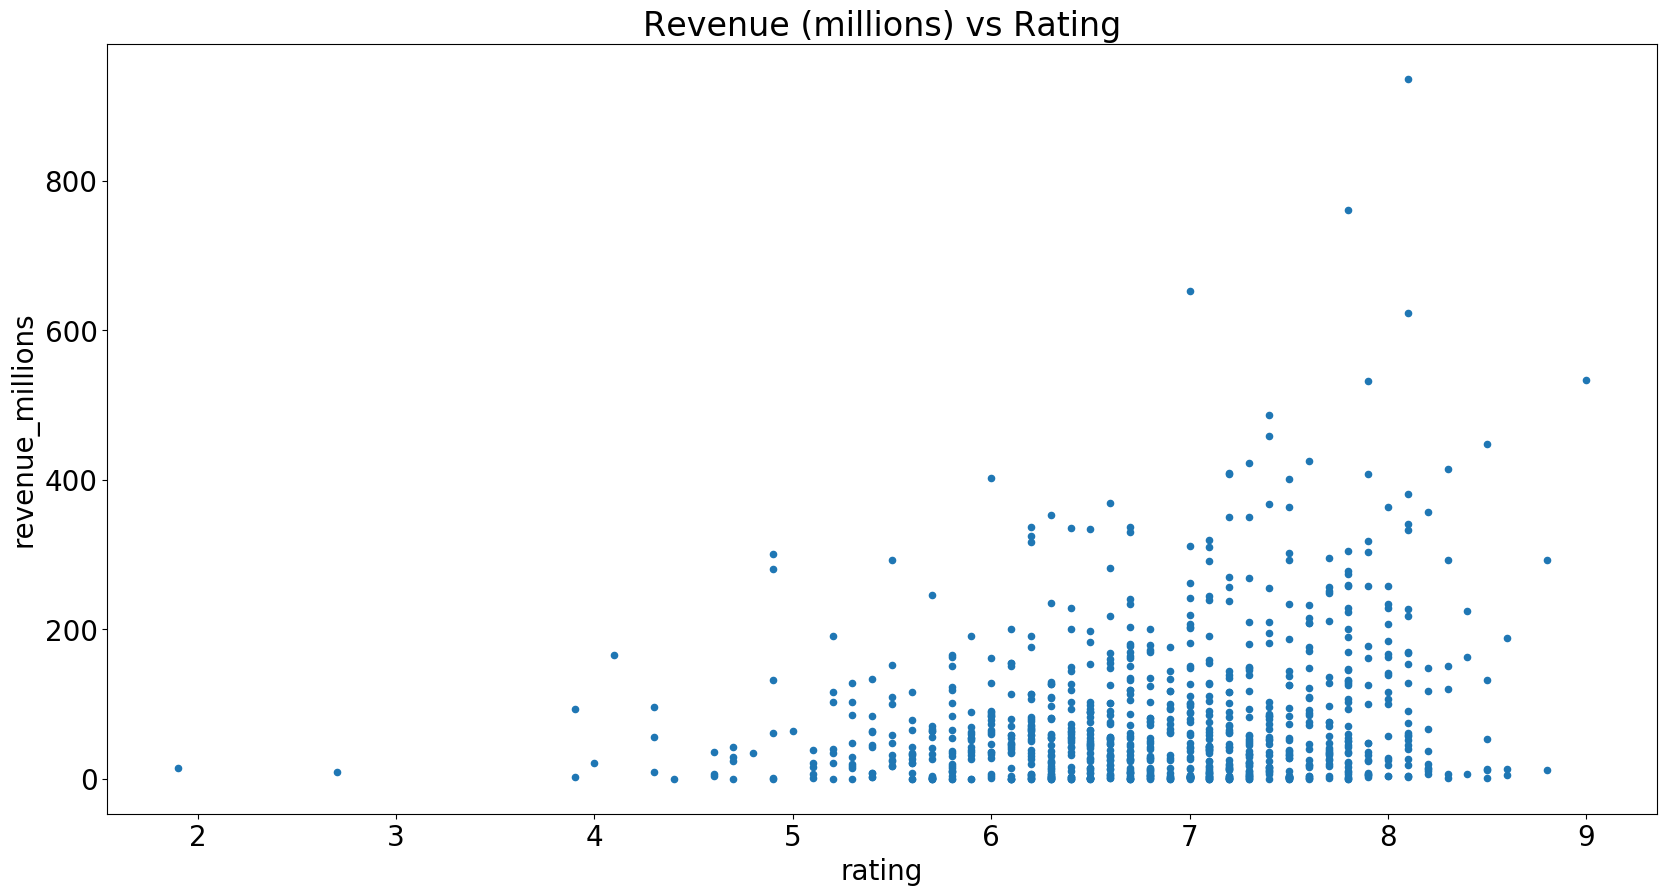

In [ ]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a typo, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebook environments.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

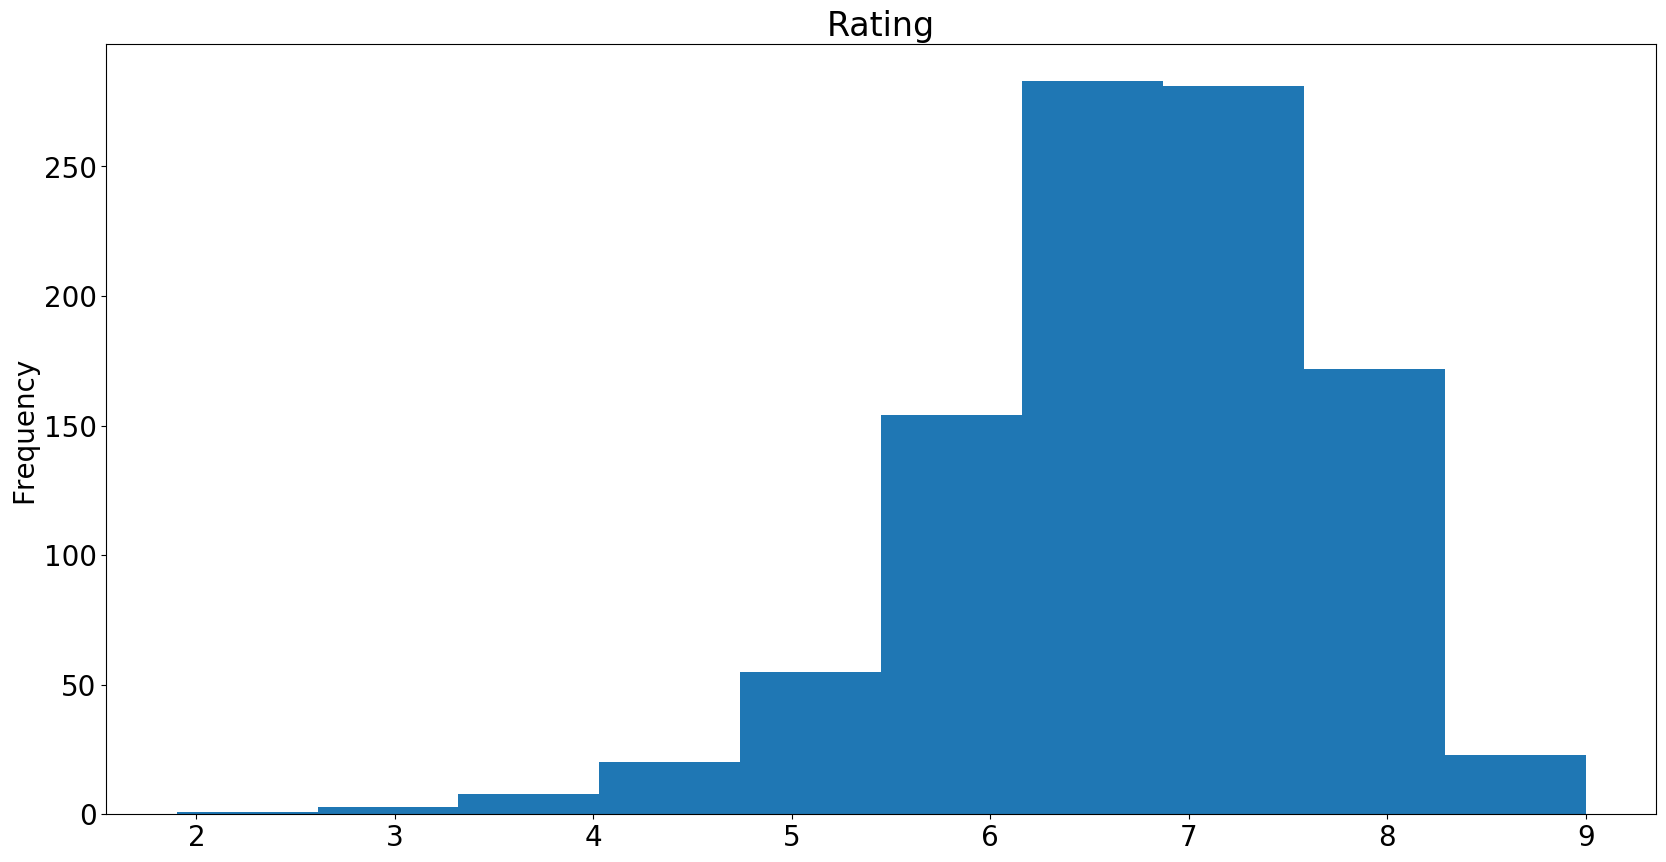

In [ ]:
movies_df['rating'].plot(kind='hist', title='Rating');

Do you remember the `.describe()` example at the beginning of this lecture? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [ ]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Using a Boxplot we can visualize this data:

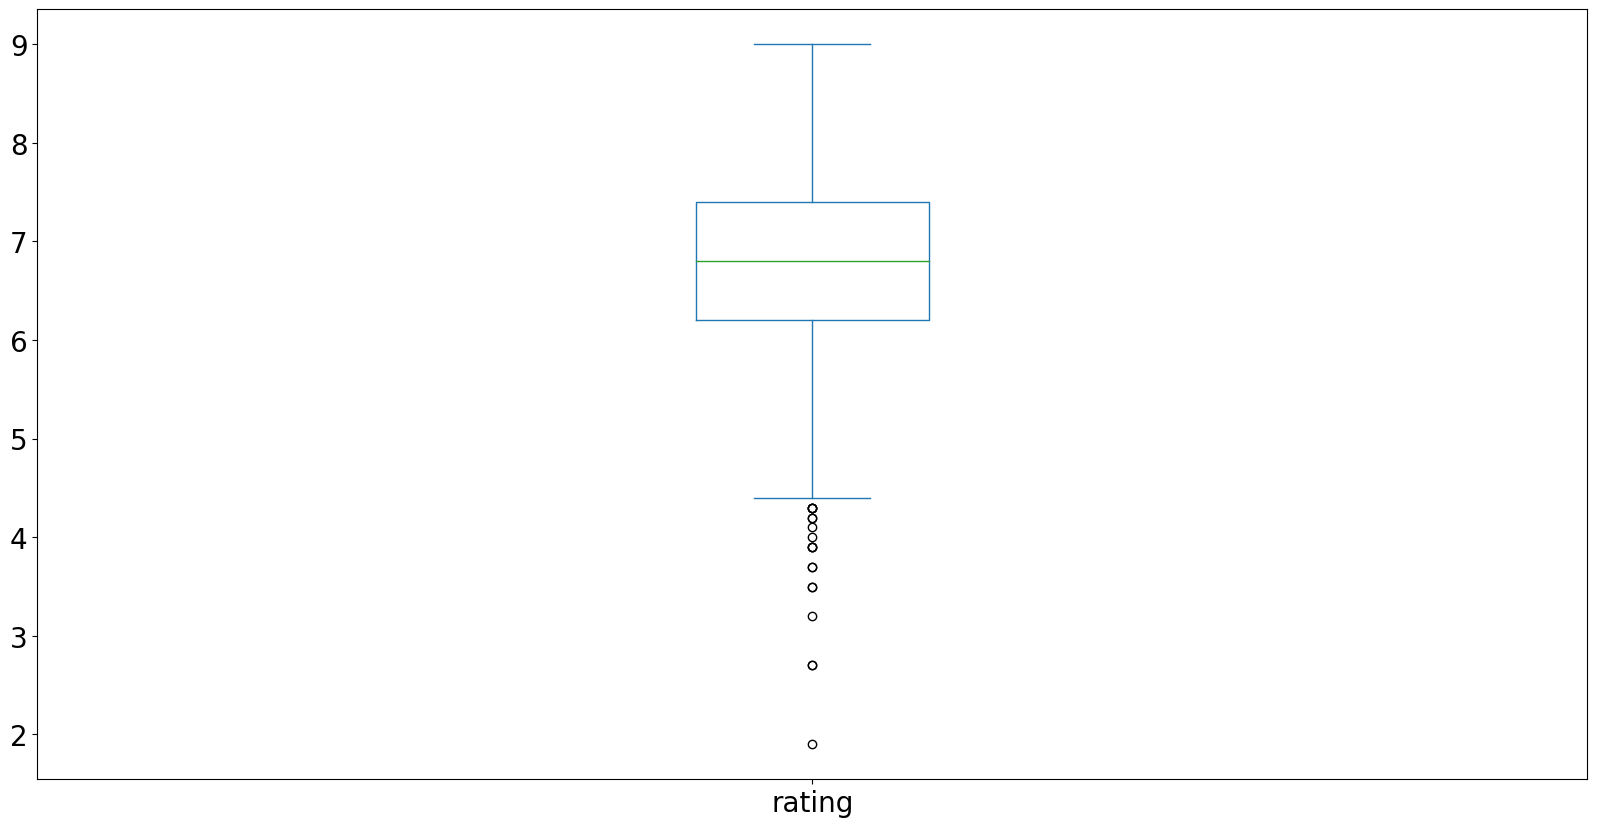

In [ ]:
movies_df['rating'].plot(kind="box");

Here is how to read a Boxplot:

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

c:\Users\wangy\Anaconda3\envs\ML\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


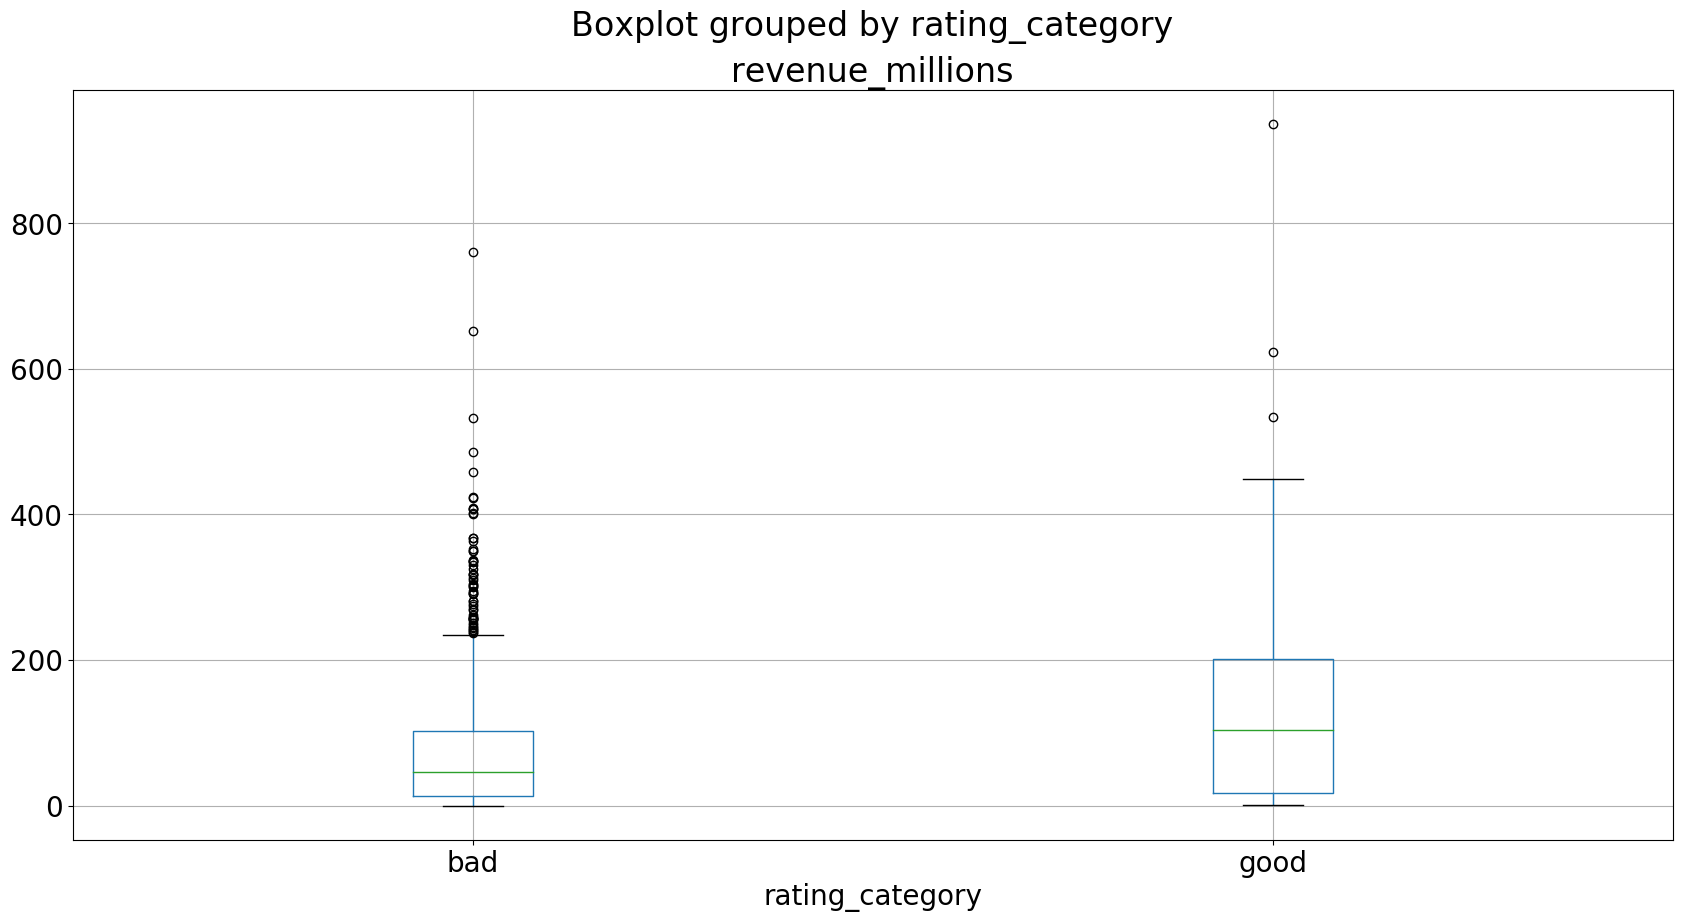

In [ ]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

That's the general idea of plotting with pandas. There's too many plots to mention, so definitely take a look at the `plot()` [docs here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more information on what it can do.

# Exercise: Make an Adjusted Rating Column, plot the difference

In the imdb data that we've been looking at, the rating is just the mean score. But some movies have many more votes than others, and this should lend more "weight" to their rating.  

A good adjusted scoring rule is:
```
 rating_adjusted = rating - (rating - 5)*2**(-log10(votes+1))
```
(note: to implement this, we can use `np.log10()` )

Make a new column called 'rating_adjusted' to implement this. Then, make a scatter plot of (rating_adjusted - rating) vs  rating.

note: it's okay if you want to make a column `rating_delta = rating_adjusted - rating`.

Now calculate the `rating_delta` and `rating_adjusted` and make a scatterplot with `rating` on the x-axis and `rating_delta` or `rating_adjusted` on the y-axis.

In [ ]:
# Write your code here


## Solution: Don't look at this until you've tried it! (You might have to do this on the final!)

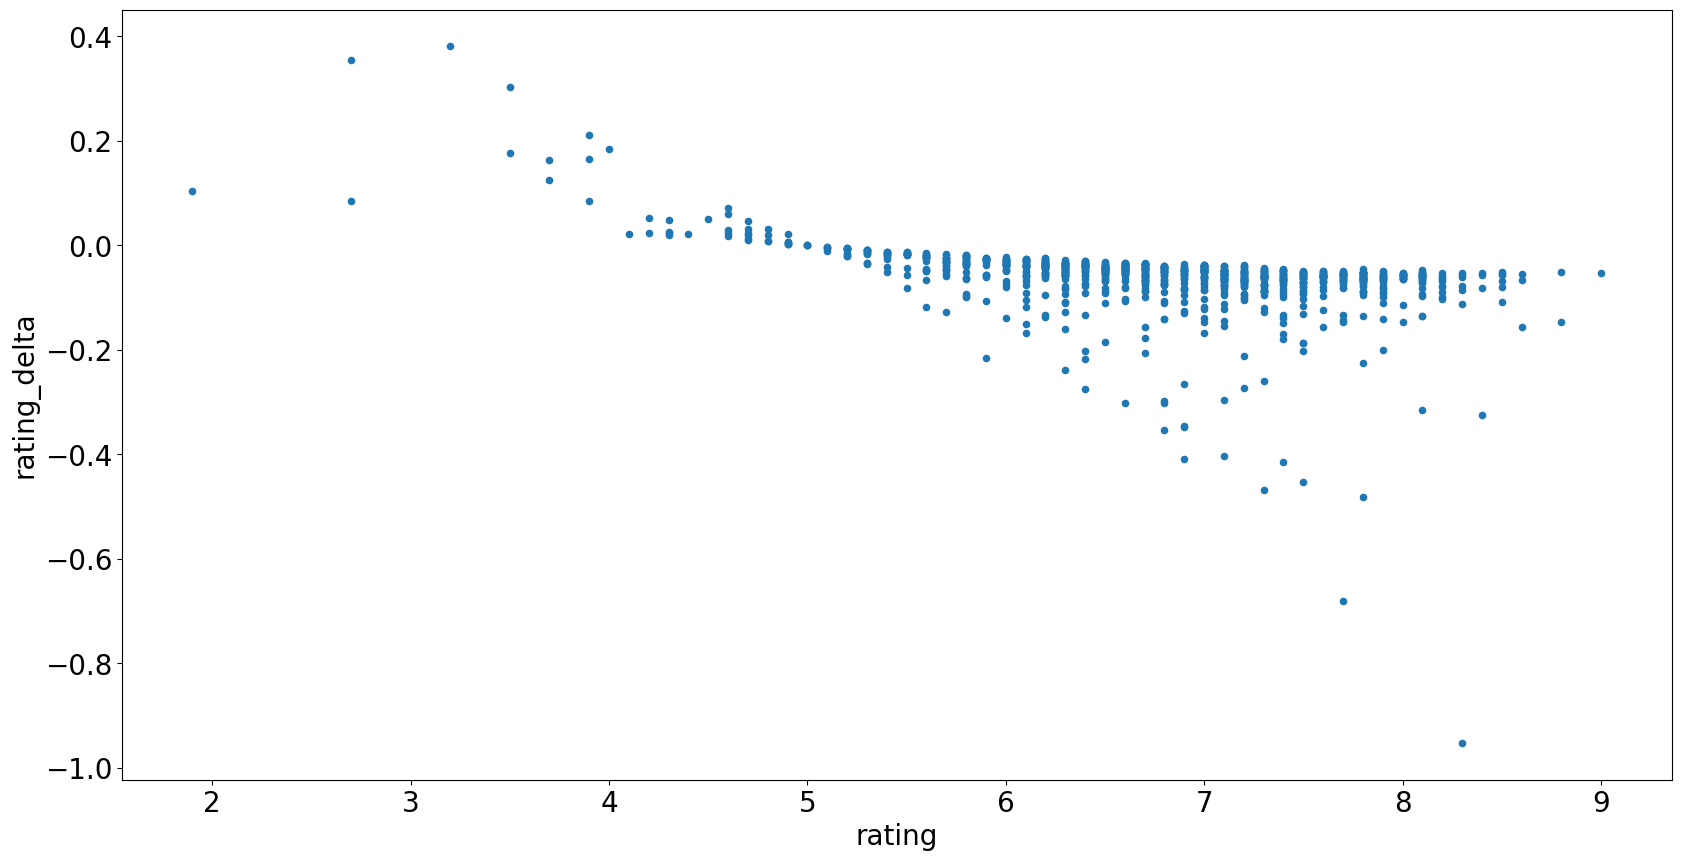

In [ ]:
# Write your code here
movies_df.head()

# Solution using apply:
movies_df['rating_adjusted'] = movies_df.apply(lambda row: row['rating']-(row['rating']-5)*2**(-np.log10(row['votes']+1)),axis=1)

# Solution w/o using apply (better):
movies_df['rating_adjusted'] = movies_df.rating - (movies_df.rating-5)*2**(-np.log10(movies_df.votes+1))
movies_df['rating_delta'] = movies_df.rating_adjusted - movies_df.rating
movies_df.plot(kind='scatter',x='rating',y='rating_delta',figsize=(20,10));

# Exercise: Plot of Revenue vs Adjusted Rating for only one Genre



Using the `movies_df` DataFrame, write a function that will plot the scatterplot of Revenue vs Metascore for only one Genre.

Your function should:
- have an input argument that is a string of the Genre, e.g., 'Horror'


Note that the an entry in the genre column contains a comma-separated list of different genres that a movie belongs to:

In [ ]:
movies_df.genre[1:10]

Title
Prometheus              Adventure,Mystery,Sci-Fi
Split                            Horror,Thriller
Sing                     Animation,Comedy,Family
Suicide Squad           Action,Adventure,Fantasy
The Great Wall          Action,Adventure,Fantasy
La La Land                    Comedy,Drama,Music
Mindhorn                                  Comedy
The Lost City of Z    Action,Adventure,Biography
Passengers               Adventure,Drama,Romance
Name: genre, dtype: object

However, we can get all the individual unique genres by using Pandas built in string operations on a series:

In [ ]:
import numpy as np
allGenresConcatenated = movies_df.genre.str.cat(sep=',') # This will return a string by concatenating all the strings in each row of genre, separating them with a ',' 
allGenres=np.unique(allGenresConcatenated.split(',')) # This will split the string so that we have a list and then use numpy's unique() to get only the unique elements of the list
allGenres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

You may find the following string method of dataframes useful:
- If a dataframe `df` has a string columm, `stringCol`, then the method
 - `df.stringCol.str.contains(someString)` will return `True` if someString is a substring within a value of stringCol.

Your goal is to define a function that will return a plot object. The function should make a scatter plot of `rating_adjusted` on the x-axis and `revenue_millions` on the y-axis.



In [ ]:
# Define your function here
def plot_rev_vs_rating_adj(genreName):
  plot = # fill in your code here with plot = movies_df[SOMETHING].plot(SOMETHING)
  plot.set_title(genreName) 
  return plot

# Run your function for the genre's 'Horror' and 'Action'
plot = plot_rev_vs_rating_adj('Horror')
plot = plot_rev_vs_rating_adj('Action')

SyntaxError: invalid syntax (1129111104.py, line 3)

## Solution: Don't look at this until you've tried it!

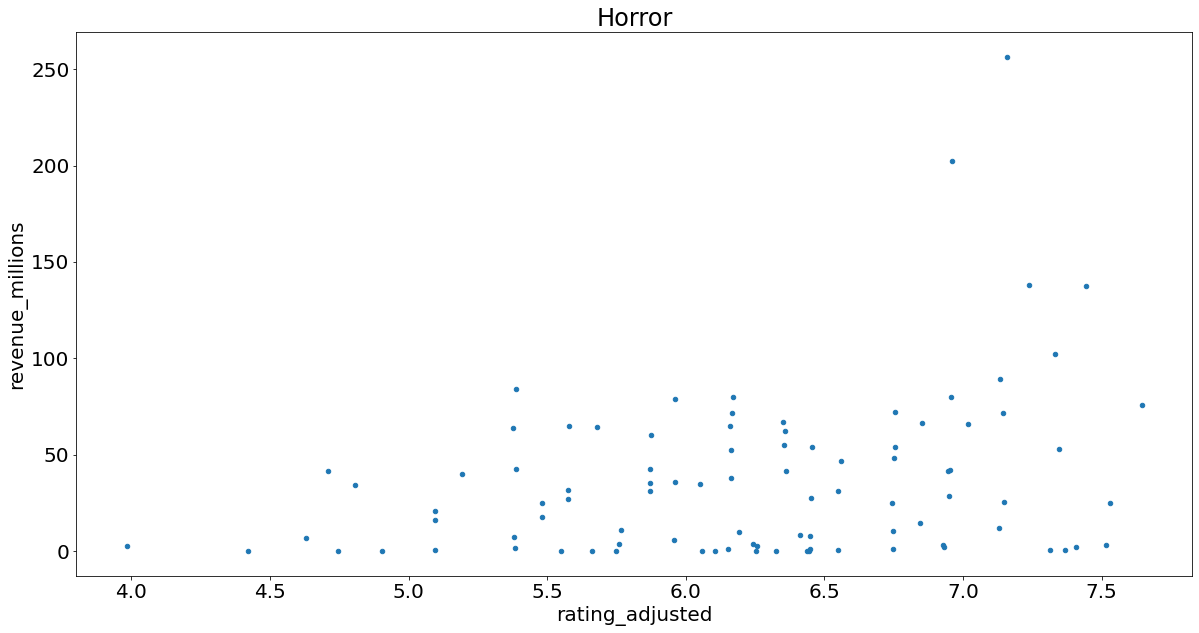

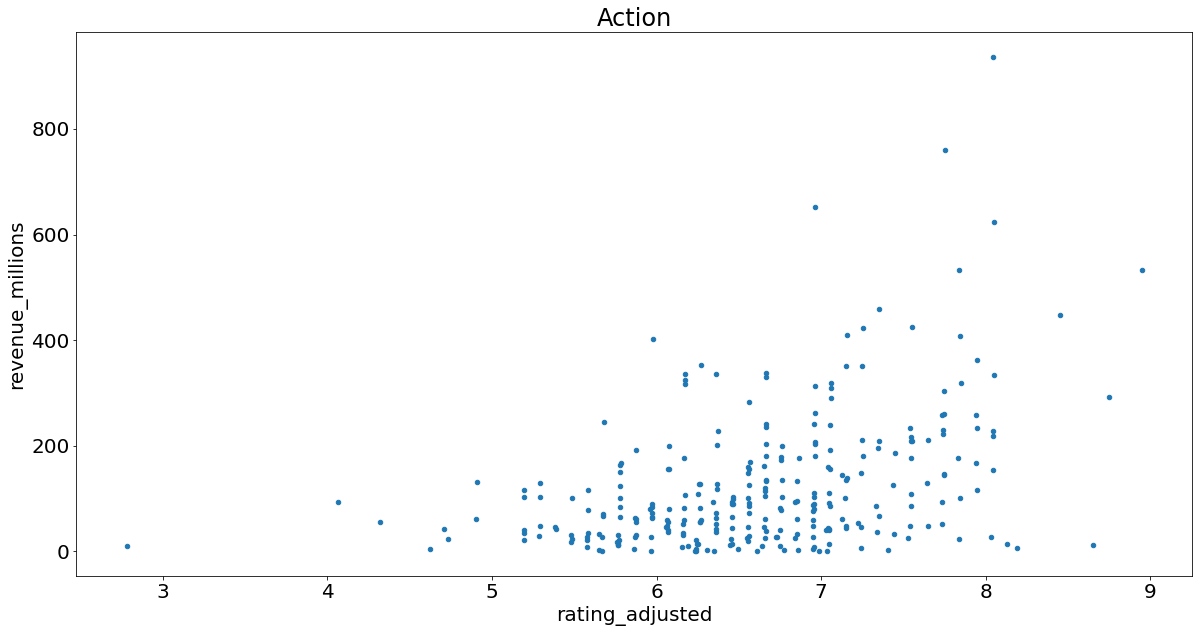

In [ ]:
def plot_rev_vs_rating_adj(genreName):
  plot = movies_df[movies_df.genre.str.contains(genreName)].plot(kind='scatter',x='rating_adjusted',y='revenue_millions')
  plot.set_title(genreName)
  return plot

plot=plot_rev_vs_rating_adj('Horror')
plot=plot_rev_vs_rating_adj('Action')

It would be nice if we could make a boxplot of the distribution of revenue across all genres in the same plot... we'll come back to this later, when we've learned some more tools to help us do this.

# Indexing Series and DataFrames

You can access a given column of a DataFrame two ways:

In [ ]:
movies_df.genre # property-style column access

Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
                                     ...           
Secret in Their Eyes            Crime,Drama,Mystery
Hostel: Part II                              Horror
Step Up 2: The Streets          Drama,Music,Romance
Search Party                       Adventure,Comedy
Nine Lives                    Comedy,Family,Fantasy
Name: genre, Length: 1000, dtype: object

In [ ]:
movies_df['genre'] # dictionary-style column access

Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
                                     ...           
Secret in Their Eyes            Crime,Drama,Mystery
Hostel: Part II                              Horror
Step Up 2: The Streets          Drama,Music,Romance
Search Party                       Adventure,Comedy
Nine Lives                    Comedy,Family,Fantasy
Name: genre, Length: 1000, dtype: object

You can slice elements of a DataFrame using its index:

In [ ]:
movies_df['Prometheus':'Suicide Squad']

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_adjusted,rating_delta
Title,,,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,6.961164,-0.038836
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,7.237324,-0.062676
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,7.120040,-0.079960
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,6.175177,-0.024823


Notice that we can't get the row of a DataFrame by specifying an index value:

In [ ]:
movies_df['Prometheus'] # this will throw a key error, because dictionary-style access of a dataframe is keyed on column names

KeyError: 'Prometheus'

We'll see soon how to access a row of a DataFrame based on the index value using `.loc[]`.

You can also combine these with slicing

In [ ]:
movies_df.genre['Prometheus':'Suicide Squad'] # slice a Series using the DataFrame explicit index

Title
Prometheus       Adventure,Mystery,Sci-Fi
Split                     Horror,Thriller
Sing              Animation,Comedy,Family
Suicide Squad    Action,Adventure,Fantasy
Name: genre, dtype: object

In [ ]:
movies_df.genre[1:5] # slice a Series using the implicit row index

Title
Prometheus       Adventure,Mystery,Sci-Fi
Split                     Horror,Thriller
Sing              Animation,Comedy,Family
Suicide Squad    Action,Adventure,Fantasy
Name: genre, dtype: object

### Implicit and Explicit Indexes with `.loc[]` and `iloc[]`

As we just learned, you can set an Index for DataFrames and Series (columns of DataFrames). And you can use the row numbers (instead of the index defined) to access or slice a Series (column) as well.

Using the row numbers for access is referred to as *implicit* indexing. While using the DataFrame's defined index is referred to as *explicit* indexing.


There is one case where things can get confusing, which is when the explicit index has integer values. 

Let me show you why with an example: 

In [73]:
data = pd.Series(['a', 'b', 'c','d'], index=[1, 3, 5,7])
data

1    a
3    b
5    c
7    d
dtype: object

We can always use a slicing operation (with ``:``) to get a range of the rows:

In [74]:
data[2:4] # this will return a slice of the 2nd and 3rd rows using the implicit row index

5    c
7    d
dtype: object

But if we ask for a single row with `[]` it will use our explicit index:

In [75]:
data[3] # explicit index

'b'

In [76]:
data[4] # this will throw a key error, because our data doesn't have a row index of 4 with our explicit (pandas) index  

KeyError: 4

To avoid this implicit vs explicit indexing confusion, Pandas has two special indexer attributes: 
- `.loc[]` to access the explicit index (the pandas one that we defined)
- `.iloc[]` to access the implicit index (the python-style one, as with lists)

This allows us to access elements by implicit or explicit index and to slice by index or explicit indexing:

In [77]:
data

1    a
3    b
5    c
7    d
dtype: object

In [78]:
data.iloc[2:4] # this is the python implicit style, so it will return rows 2 and 3

5    c
7    d
dtype: object

In [79]:
data.loc[1:5] # this is the explicit pandas style index, so it will return rows with index 1,3,5


1    a
3    b
5    c
dtype: object

ASIDE: It's a bit funny that slicing with explicit indexing includes the last element of the range specified (``data.loc[1:5]`` includes 5), while slicing with implicit does not (``data.iloc[2:4]`` doesn't include 4). It is defined this way in order for `iloc[]` to be consistent with the way Python usually indexes collections.

IMPORTANT: Its good practice to always use `.loc[]` and `.iloc[]` instead of just `[]` whenever possible, to avoid confusion.

Another advantage of the `.loc[]` indexer is that it allows us to select a row (or a slice of a row) from a DataFrame with the index:

In [80]:
movies_df.loc['Prometheus'] # Get one row

Rank                                                                  2
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                              7.0
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                          65.0
Name: Prometheus, dtype: object

In [83]:
movies_df.loc['Prometheus':'Sing'] # Get a slice

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


So we could then do things like this:

In [85]:
movies_df.loc['Prometheus'].Genre

'Adventure,Mystery,Sci-Fi'

### MultiIndexes 



There are many occasions where the nature of the data we are analyzing would require rows that relate to more than one index.  For example, consider the case where we want to track the populations metrics of US states across different years. 

We might have data like this:
```
                    Population
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
```

To create a Series that handles this type of data appropriately, we would use a ``MultiIndex``:

In [86]:
pop_series=pd.Series([33871648,37253956,18976457,19378102,20851820,25145561],
                    index=pd.MultiIndex(
                        levels=[['California', 'New York', 'Texas'], [2000, 2010]],
                        names=['state','year'],
                        codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]]) # notice how codes are used to link the same state or same year
                    )
pop_series

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

We could have stored this data using a DataFrame instead of as a Series with a MultiIndex, like this:

In [87]:
pop_df=pd.DataFrame({'2000':[33871648,18976457,20851820], '2010':[37253956,19378102,25145561]},
                    index=['California', 'New York', 'Texas'])
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


However, what if we wanted to store more than just one dimension of population metrics in our DataFrame? Then we would need a MultiIndex.

For example:

In [88]:
pop_df = pd.DataFrame({'total': pop_series,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
state      year                   
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

Pandas allows us to "stack" and "unstack" a MultiIndex using the `.stack()` and `.unstack()` methods (we'll talk more about this later):

In [89]:
pop_df

total  under18
state      year                   
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [90]:
pop_total_df=pop_df.total.unstack()
pop_total_df

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Notice that we've lost the "total" title when we did this.

In [91]:
pop_under18_df=pop_df.under18.unstack()
pop_under18_df

year,2000,2010
state,,
California,9267089,9284094
New York,4687374,4318033
Texas,5906301,6879014


And of course we can stack it back again, like this:

In [92]:
pop_under18_df.stack()

state       year
California  2000    9267089
            2010    9284094
New York    2000    4687374
            2010    4318033
Texas       2000    5906301
            2010    6879014
dtype: int64

though notice that the column name is lost when we do this, so we would have to set it again if we wanted to.  

Also notice that `.stack()` returned a series, since we only had one column.

In [93]:
type(pop_under18_df.stack())

pandas.core.series.Series

### Working with MultiIndexed DataFrames

When we have a MultiIndexed Series or DataFrame, we can access an element or row like this:

In [94]:
pop_series

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [95]:
pop_series.loc['California',2000]

33871648

In [ ]:
pop_df

In [ ]:
pop_df.loc['California',2000]

or even slice it, provide that the MultiIndex is sorted (see the pandas documentation for  [sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html#pandas-dataframe-sort-index)):

In [ ]:
pop_series.loc['California':'New York']

In [ ]:
pop_series.loc['California':'New York',2000] 

Other types of indexing also works with MultiIndexes, such as boolean masks:

In [ ]:
pop_series.loc[pop_series>22000000]

Or even fancy indexing:

In [ ]:
pop_series.loc[['California','Texas'],2000]

# Reference: Pandas Cheat Sheet

Here is a very useful [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) that you will want to reference until you get comfortable working with Pandas.
